<a href="https://colab.research.google.com/github/nasiksami/Python-Projects/blob/main/Data_Visualization_on_Olympic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Link: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results**

In [4]:
#Importing All the Libraries And Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/athlete_events.csv')

In [7]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


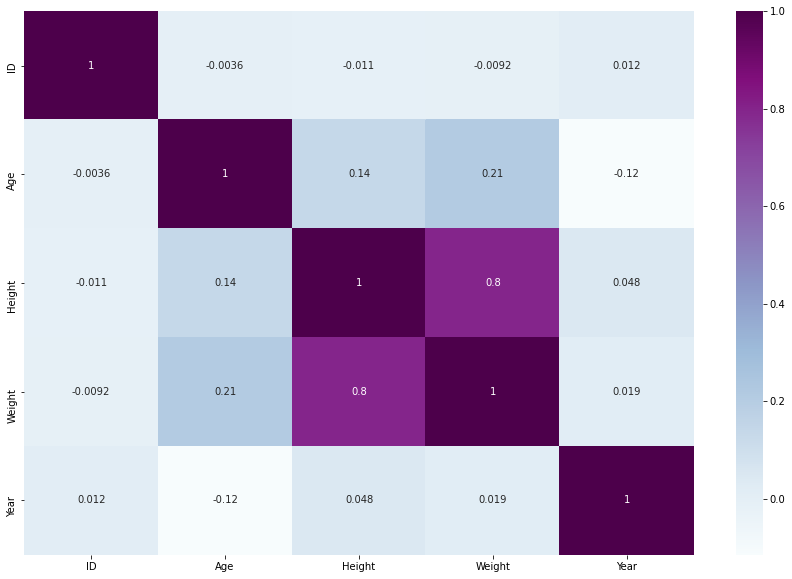

In [10]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")


In [11]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

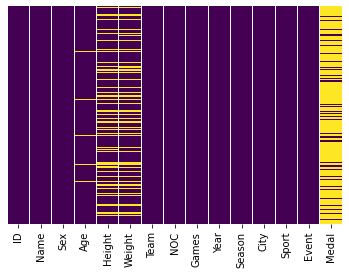

In [12]:
#showing the null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


Here we can see there are lots of missing values in the Height, Weight and Medal columns. We can use different methods to handle these missing values.

In [13]:
# find the null values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [15]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [16]:
df['Height'] = df['Height'].fillna(df['Height'].median())
df['Weight'] = df['Weight'].fillna(df['Weight'].median())

I've used Median method to eleminate the null values because it will sensibly handle the outliers from the dataset, if any outlier is available. Where mean method can lead to a biased output

In [17]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

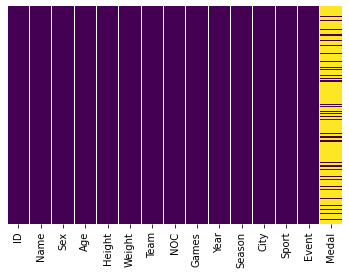

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We are not filling in the missing values for Medal because it will affect the outpput of the visualization and give bias results.

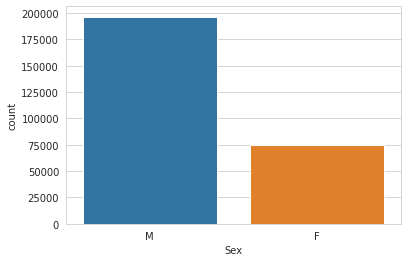

In [19]:
#showing the countplot  to how many athletes were male and how many of them were female.
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=df)

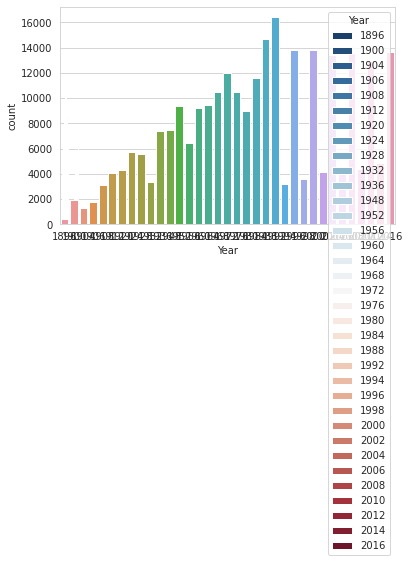

In [20]:

sns.set_style('whitegrid')
sns.countplot(x='Sex',hue='Year',data=df,palette='RdBu_r')
ax = sns.countplot(x="Year", data=df)

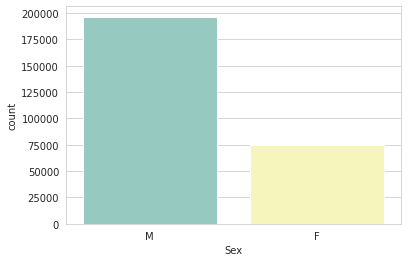

In [21]:
ax = sns.countplot(x="Sex", data=df, palette="Set3")

In [22]:
df.City.unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [23]:
df.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [24]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [25]:

def groupage(Age):
    if Age < 18:
        return "Junior"
    elif Age >=18 and Age < 25:
        return "Matured"
    else:
        return "Senior"
      
groupage = df['Age'].apply(groupage)
df.insert(10, "Groupage", groupage, True)
df.head(5)



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Groupage,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Matured,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Matured,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Matured,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Senior,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Matured,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


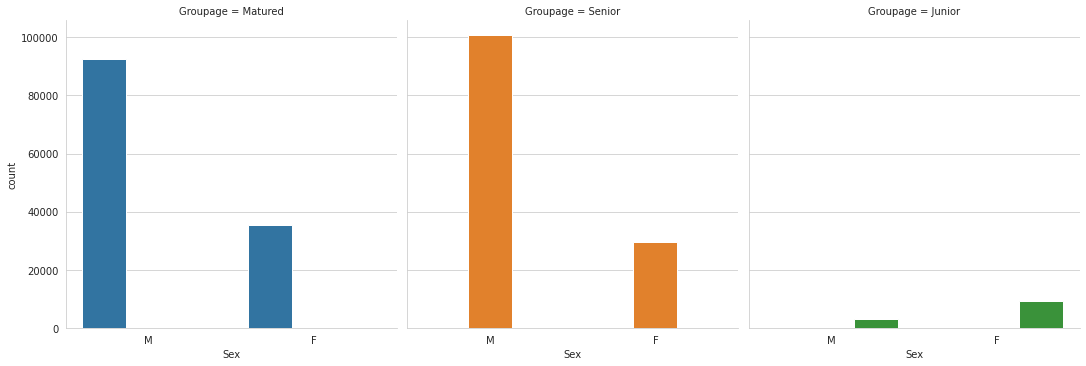

In [27]:
%matplotlib inline
g = sns.catplot(x="Sex", hue="Groupage", col="Groupage", data=df, kind="count", height=5, aspect=1)
plt.show()

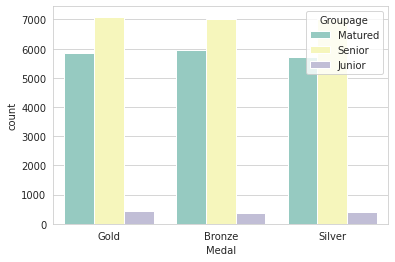

In [28]:
ax = sns.countplot(x="Medal", hue="Groupage",data=df, palette="Set3")


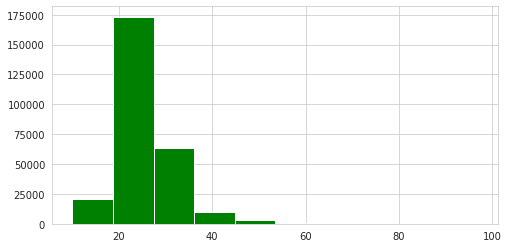

In [29]:
df['Age'].hist(color='green',bins=10,figsize=(8,4))

In [30]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'City': 42,
 'Event': 765,
 'Games': 51,
 'Groupage': 3,
 'Medal': 4,
 'NOC': 230,
 'Name': 134732,
 'Season': 2,
 'Sex': 2,
 'Sport': 66,
 'Team': 1184}

In [31]:
Denmark_Medals = (df[(df.NOC == 'DEN') & 
                    ((df.Medal == 'Gold') | 
                     (df.Medal == 'Silver')|
                     (df.Medal == 'Bronze'))].loc[:,["Year","Medal"]])


Text(0.5, 1.0, 'Denmark Medals Over the Years')

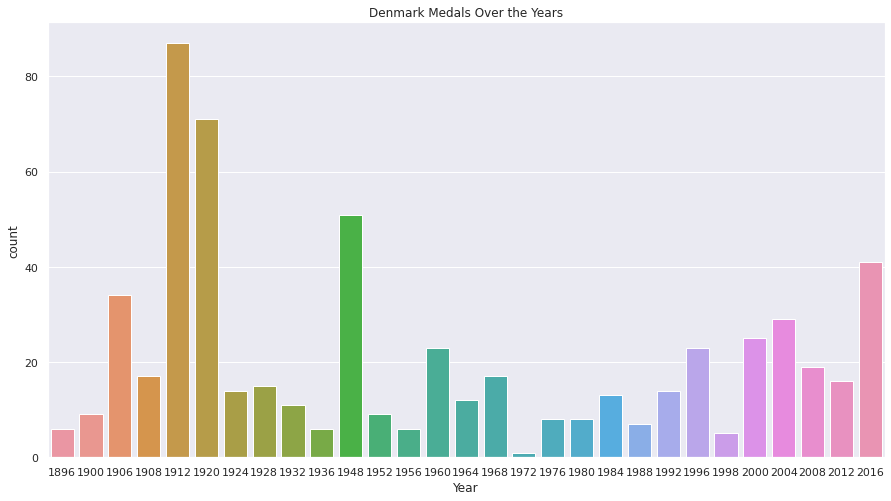

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 8))
sns.countplot(x='Year', data=Denmark_Medals)
plt.title('Denmark Medals Over the Years')

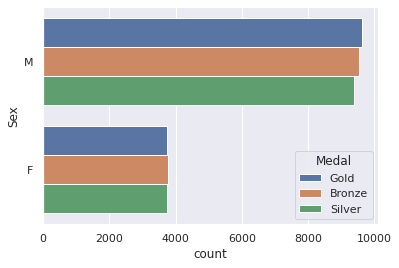

In [33]:
ax = sns.countplot(y="Sex", hue="Medal", data=df)

**Countries participation at Summer Olympic Games**

In [34]:
countries_participated = df[df.Season=="Summer"].groupby(["Year"])\
["NOC"].value_counts().reset_index(name='Count').sort_values(["Year"])


Text(0.5, 1.0, 'Countries participation at Summer Olympic Game')

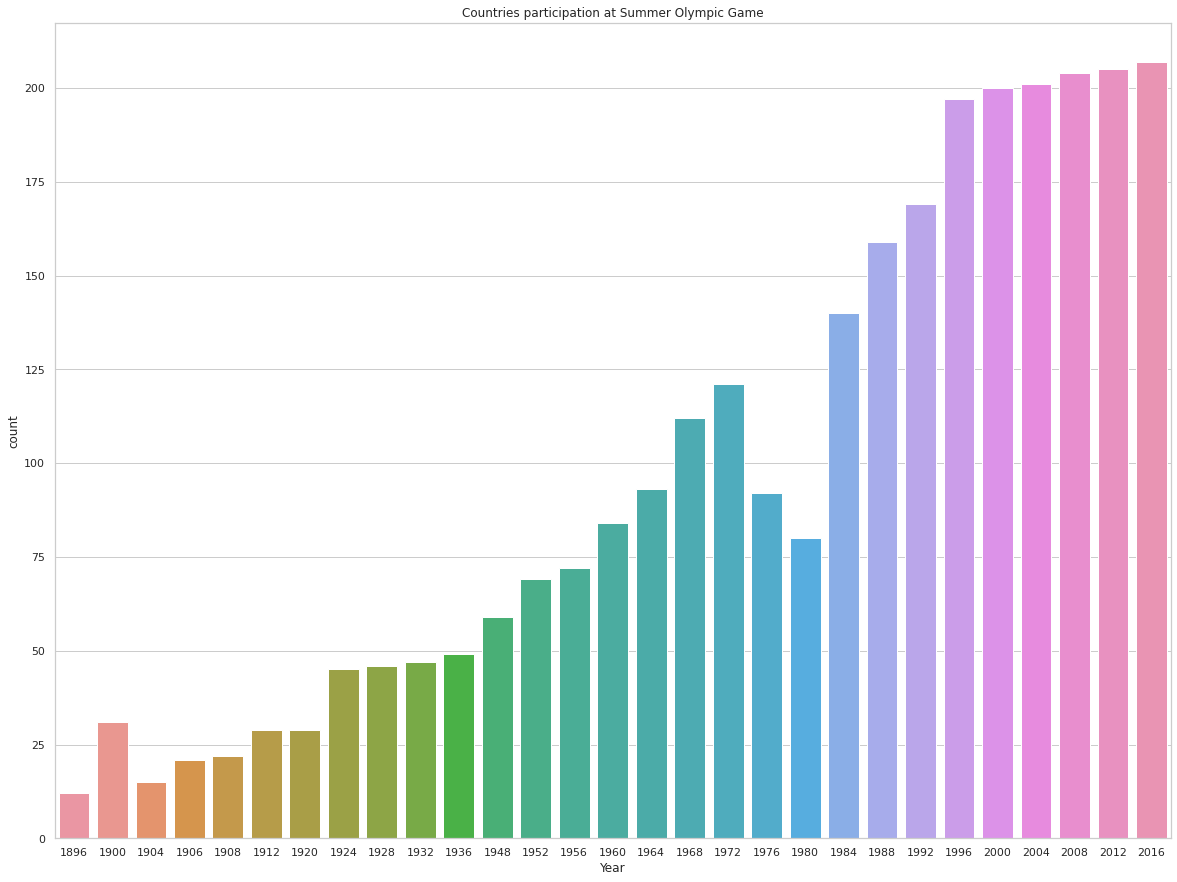

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.countplot('Year', data=countries_participated)
plt.title("Countries participation at Summer Olympic Game")